## discovering data

In [1]:
# Import data and take a look

import numpy as np
import pandas as pd

df = pd.read_csv('/content/winemag-data-130k-v2.csv')

In [2]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [3]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [4]:
df.shape

(129971, 14)

In [5]:
print(df['price'].value_counts().sort_values(ascending=False))

20.0      6940
15.0      6066
25.0      5805
30.0      4951
18.0      4883
          ... 
198.0        1
1125.0       1
470.0        1
268.0        1
848.0        1
Name: price, Length: 390, dtype: int64


## analyse valeur null

In [6]:
# Take a look at the outcome variable: 'income'
print(df['points'].value_counts().sort_values(ascending=False))

88     17207
87     16933
90     15410
86     12600
89     12226
91     11359
92      9613
85      9530
93      6489
84      6480
94      3758
83      3025
82      1836
95      1535
81       692
96       523
80       397
97       229
98        77
99        33
100       19
Name: points, dtype: int64


In [7]:
#pourcentage des valeur null 
l = df.isnull().sum().sort_values(ascending=False)
j=1
tab=[[]]
for i in df.isnull().sum().sort_values(ascending=False).keys() :
  print("le pourcentage de ",i, "\t est",l[i]/129971*100)

le pourcentage de  region_2 	 est 61.136715113371444
le pourcentage de  designation 	 est 28.825661109016625
le pourcentage de  taster_twitter_handle 	 est 24.01535727200683
le pourcentage de  taster_name 	 est 20.192196720806947
le pourcentage de  region_1 	 est 16.34749290226281
le pourcentage de  price 	 est 6.921544036746659
le pourcentage de  country 	 est 0.04847235152457087
le pourcentage de  province 	 est 0.04847235152457087
le pourcentage de  variety 	 est 0.0007694024051519185
le pourcentage de  Unnamed: 0 	 est 0.0
le pourcentage de  description 	 est 0.0
le pourcentage de  points 	 est 0.0
le pourcentage de  title 	 est 0.0
le pourcentage de  winery 	 est 0.0


In [8]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
region_2,79460,0.611367
designation,37465,0.288257
taster_twitter_handle,31213,0.240154
taster_name,26244,0.201922
region_1,21247,0.163475
price,8996,0.069215
country,63,0.000485
province,63,0.000485
variety,1,0.000008
Unnamed: 0,0,0.000000


In [9]:
def Missing_Values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],5))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,"Missing_Value_Rate":missing_value_rate,
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    
    return missing_data.sort_values("Missing_Value_Rate",ascending=False)

In [10]:
data_info=Missing_Values(df)
data_info = data_info.set_index("Variable")
data_info

,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
region_2,129971,79460,0.61137,object,"[nan, Willamette Valley, Napa, Sonoma, Central...",18
designation,129971,37465,0.28826,object,"[Vulkà Bianco, Avidagos, nan, Reserve Late Har...",37980
taster_twitter_handle,129971,31213,0.24015,object,"[@kerinokeefe, @vossroger, @paulgwine , nan, @...",16
taster_name,129971,26244,0.20192,object,"[Kerin O’Keefe, Roger Voss, Paul Gregutt, Alex...",20
region_1,129971,21247,0.16347,object,"[Etna, nan, Willamette Valley, Lake Michigan S...",1230
price,129971,8996,0.06922,float64,"[nan, 15.0, 14.0, 13.0, 65.0, 16.0, 24.0, 12.0...",391
country,129971,63,0.00048,object,"[Italy, Portugal, US, Spain, France, Germany, ...",44
province,129971,63,0.00048,object,"[Sicily & Sardinia, Douro, Oregon, Michigan, N...",426
variety,129971,1,0.00001,object,"[White Blend, Portuguese Red, Pinot Gris, Ries...",708


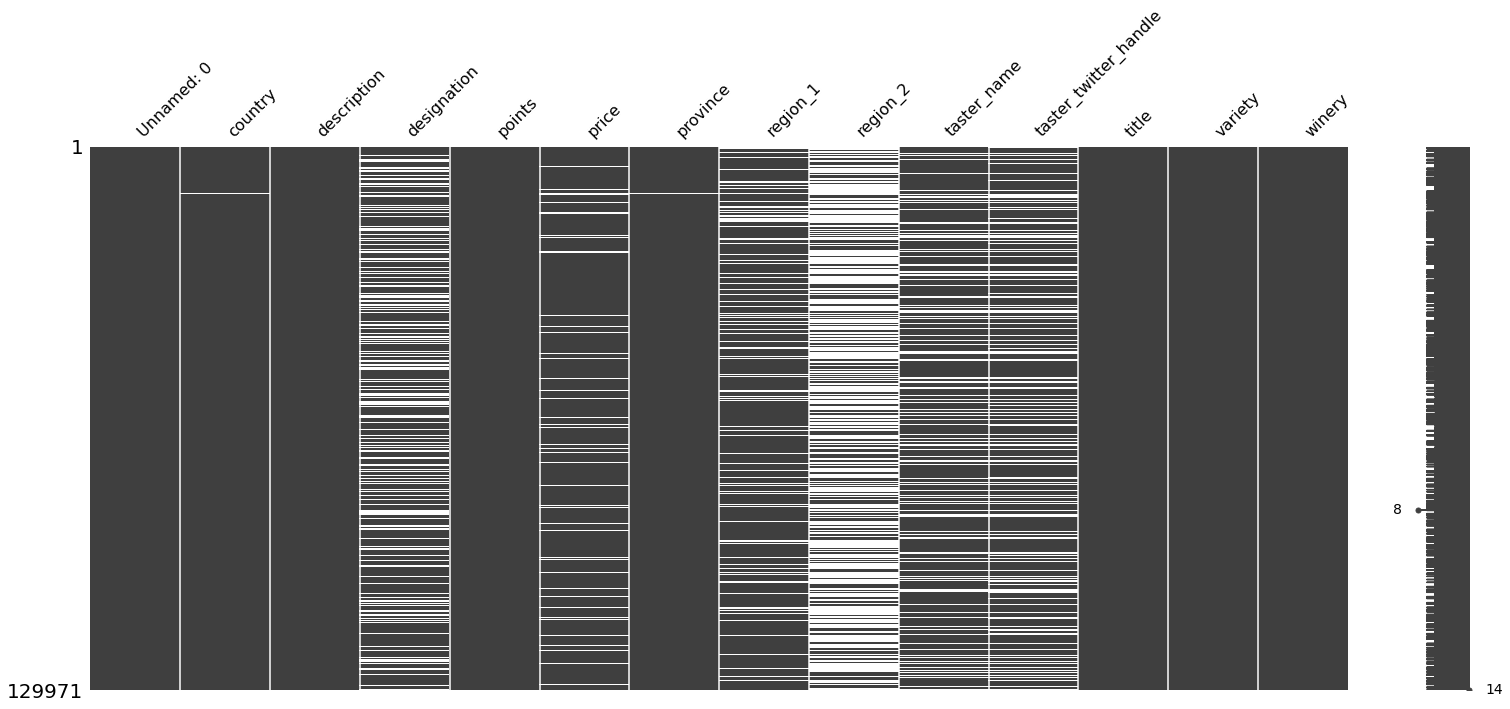

In [11]:
import missingno as msno
msno.matrix(df)


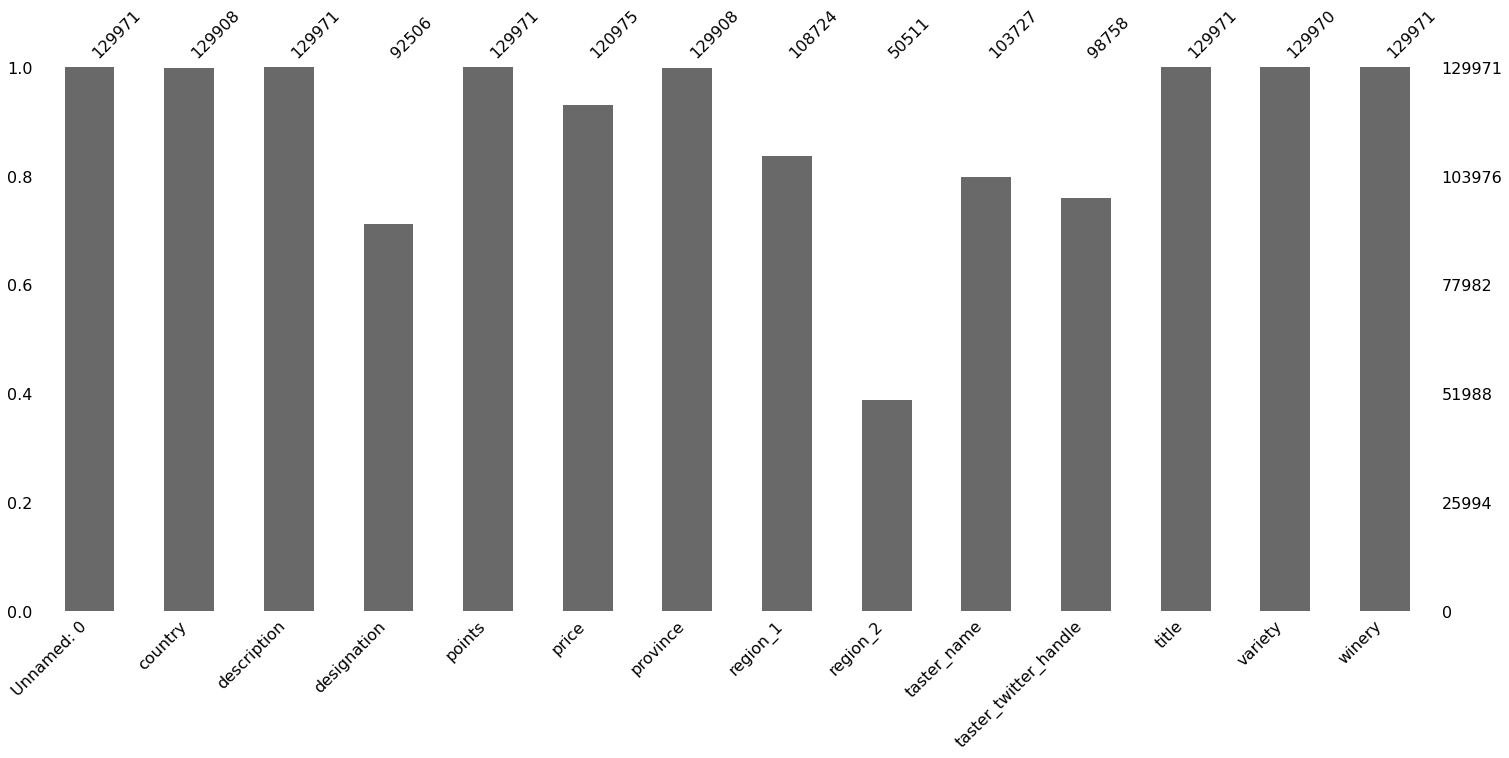

In [12]:
msno.bar(df)

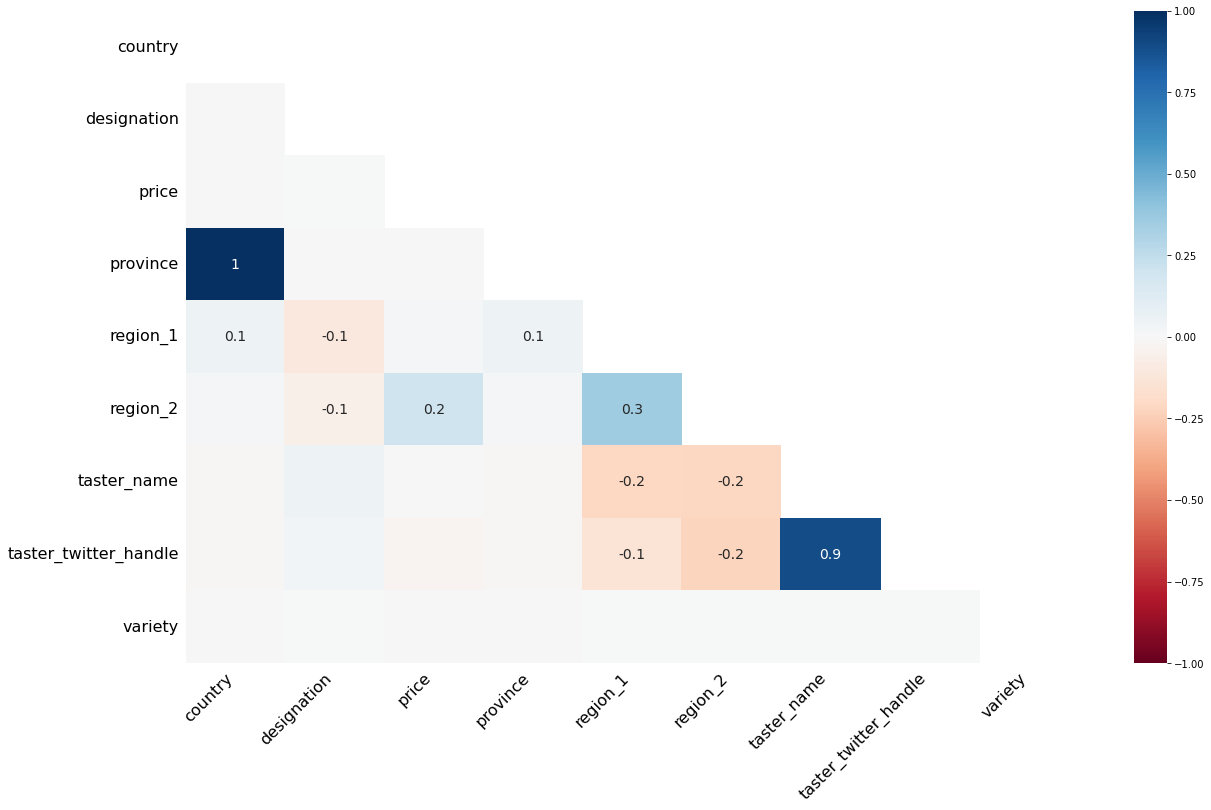

In [13]:
msno.heatmap(df)

methode 1 imputation (impute all column categorical and numerical)

In [14]:
categorical_columns=data_info[data_info["Data_Type"]=="object"].index
numerical_columns=data_info[(data_info["Data_Type"]=="float64") | (data_info["Data_Type"]=="int64")].index
len(categorical_columns),len(numerical_columns)

(11, 3)

In [15]:
from scipy import stats
def simple_imputer(df,columns):
  for col in columns:
    total_nan=int(df[col].isnull().sum())
    if(col in categorical_columns):
      most_frequent_value=str(stats.mode(df[col])[0][0])
      df[col]=df[col].fillna(most_frequent_value)
      print("Total imputed in {} : {} ".format(col,total_nan))
    else:  
      mean=df[col].mean()
      std=df[col].std()
      random_normal=np.random.normal(loc=mean,scale=std,size=total_nan) 
      df[col][df[col].isnull()]=random_normal
      print("Total imputed in {} : {} ".format(col,total_nan))
  return df

data_simple_imp=df.copy()
columns=list(data_info[(data_info["Missing_Value_Rate"]>0 )& (data_info["Missing_Value_Rate"]<0.1 ) ].index)
columns.append("designation")
data_simpe_imp=simple_imputer(data_simple_imp,columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Total imputed in price : 8996 
Total imputed in country : 63 
Total imputed in province : 63 
Total imputed in variety : 1 
Total imputed in designation : 37465 


// price have 6% of null value => thats okay => maybe we can work with regression

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


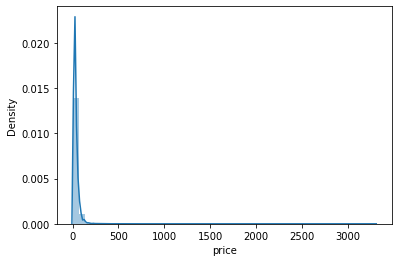

In [16]:
import seaborn as sns
sns.distplot(df['price'])

warning
we dont have big distribution of pricing
price not gonna work for anything (no regression no classification)

In [17]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 18.000957
Kurtosis: 829.520182


//

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


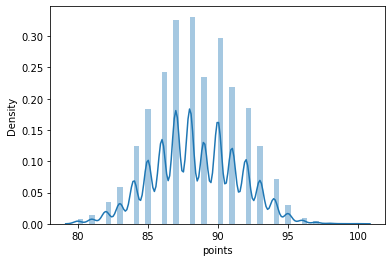

In [18]:
sns.distplot(df['points'])

//we can conclude that we cant do a regression ,because the distribution of point column   =>will lead us to overfitting 
//but we can encode this distribution of point in two or three or etc of categories , so we can work in classification case

## drop columns /more than 15% null value

In [19]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [20]:
#percentage of categorie (all type of categories)
l2=[]
d=df.shape[0]
for col_name in df.columns:
        unique_cat = len(df[col_name].unique())
        unique_cat = unique_cat/d*100
        if unique_cat>=80:
          l2.append(col_name)
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Unnamed: 0' has 100.0 unique categories
Feature 'country' has 0.03385370582668441 unique categories
Feature 'description' has 92.29366550999838 unique categories
Feature 'designation' has 29.221903347669866 unique categories
Feature 'points' has 0.01615745050819029 unique categories
Feature 'price' has 0.3008363404144001 unique categories
Feature 'province' has 0.3277654245947173 unique categories
Feature 'region_1' has 0.9463649583368597 unique categories
Feature 'region_2' has 0.013849243292734533 unique categories
Feature 'taster_name' has 0.01538804810303837 unique categories
Feature 'taster_twitter_handle' has 0.012310438482430696 unique categories
Feature 'title' has 91.435781828254 unique categories
Feature 'variety' has 0.5447369028475583 unique categories
Feature 'winery' has 12.892876103130698 unique categories


In [21]:
#lets drop this 4 columns because they have more than 15% of nall
df = df.drop(columns="region_2")
df = df.drop(columns="designation")
df = df.drop(columns="taster_twitter_handle")
df = df.drop(columns="taster_name")
#if a column have more  (80% nbr of lignes) of categories
df = df.drop(columns="Unnamed: 0")
df = df.drop(columns="description")
df = df.drop(columns="title")

In [22]:
df.columns

Index(['country', 'points', 'price', 'province', 'region_1', 'variety',
       'winery'],
      dtype='object')

## data transformation 

In [23]:
df = df.replace("?", np.nan)

In [24]:
# Decide which categorical variables you want to use in model
#only type object
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'country' has 44 unique categories
Feature 'province' has 426 unique categories
Feature 'region_1' has 1230 unique categories
Feature 'variety' has 708 unique categories
Feature 'winery' has 16757 unique categories


In [25]:
print(df['country'].value_counts().sort_values(ascending=False).head(10))

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64


In [26]:
# In this case, bucket low frequecy categories as "Other"
df['country'] = ['US ' if x == 'US' else 'France' if x=='France'else 'Italy' if x=='Italy' else 'Other' for x in df['country']]

print(df['country'].value_counts().sort_values(ascending=False))

US        54504
Other     33834
France    22093
Italy     19540
Name: country, dtype: int64


In [27]:
print(df['province'].value_counts().sort_values(ascending=False).head(10))

California          36247
Washington           8639
Bordeaux             5941
Tuscany              5897
Oregon               5373
Burgundy             3980
Northern Spain       3851
Piedmont             3729
Mendoza Province     3264
Veneto               2716
Name: province, dtype: int64


In [28]:
# In this case, bucket low frequecy categories as "Other"
df['province'] = ['California' if x == 'California' else 'Other' for x in df['province']]

print(df['province'].value_counts().sort_values(ascending=False))

Other         93724
California    36247
Name: province, dtype: int64


In [29]:
print(df['region_1'].value_counts().sort_values(ascending=False).head(20))

Napa Valley                4480
Columbia Valley (WA)       4124
Russian River Valley       3091
California                 2629
Paso Robles                2350
Mendoza                    2301
Willamette Valley          2301
Alsace                     2163
Champagne                  1613
Barolo                     1599
Finger Lakes               1565
Sonoma Coast               1474
Brunello di Montalcino     1470
Rioja                      1469
Sonoma County              1246
Toscana                    1197
Walla Walla Valley (WA)    1066
Chianti Classico           1062
Santa Barbara County       1000
Carneros                    999
Name: region_1, dtype: int64


In [30]:
# In this case, bucket low frequecy categories as "Other"
df['region_1'] = ['Napa Valley ' if x == 'Napa Valley' 
                    else 'Columbia Valley (WA)' if x=='Columbia Valley (WA)'
                    else 'Russian River Valley' if x=='Russian River Valley' 
                    else 'California' if x=='California' 
                    else 'Paso Robles' if x=='Paso Robles' 
                    else 'Mendoza' if x=='Mendoza' 
                    else 'Willamette Valley' if x=='Willamette Valley' 
                    else 'Alsace  ' if x=='Alsace' 
                    else 'Other' for x in df['region_1']]

print(df['region_1'].value_counts().sort_values(ascending=False))

Other                   106532
Napa Valley               4480
Columbia Valley (WA)      4124
Russian River Valley      3091
California                2629
Paso Robles               2350
Willamette Valley         2301
Mendoza                   2301
Alsace                    2163
Name: region_1, dtype: int64


In [31]:
print(df['variety'].value_counts().sort_values(ascending=False).head(10))
print(df['winery'].value_counts().sort_values(ascending=False).head(20))


Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64
Wines & Winemakers            222
Testarossa                    218
DFJ Vinhos                    215
Williams Selyem               211
Louis Latour                  199
Georges Duboeuf               196
Chateau Ste. Michelle         194
Concha y Toro                 164
Columbia Crest                159
Kendall-Jackson               130
Siduri                        126
Gary Farrell                  125
Lynmar                        118
Montes                        117
Albert Bichot                 117
Trapiche                      113
Undurraga                     113
Casa Santos Lima              113
Jean-Luc and Paul Ae

In [32]:
# In this case, bucket low frequecy categories as "Other"
df['variety'] = ['Pinot Noir ' if x == 'Pinot Noir' 
                    else 'Chardonnay' if x=='Chardonnay'
                    else 'Cabernet Sauvignon' if x=='Cabernet Sauvignon' 
                    else 'Red Blend' if x=='Red Blend' 
                    else 'Other' for x in df['variety']]

print(df['variety'].value_counts().sort_values(ascending=False))

Other                 86528
Pinot Noir            13272
Chardonnay            11753
Cabernet Sauvignon     9472
Red Blend              8946
Name: variety, dtype: int64


In [33]:
df = df.drop(columns="winery")

In [34]:
df

,country,points,price,province,region_1,variety
0,Italy,87,NaN,Other,Other,Other
1,Other,87,15.0,Other,Other,Other
2,US,87,14.0,Other,Willamette Valley,Other
3,US,87,13.0,Other,Other,Other
4,US,87,65.0,Other,Willamette Valley,Pinot Noir
...,...,...,...,...,...,...
129966,Other,90,28.0,Other,Other,Other
129967,US,90,75.0,Other,Other,Pinot Noir
129968,France,90,30.0,Other,Alsace,Other
129969,France,90,32.0,Other,Alsace,Other


In [35]:
todummy_list = ['country'	,'province',	'region_1'	,'variety']
# Function to dummy all the categorical variables used for modeling
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df
df = dummy_df(df, todummy_list)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,points,price,country_France,country_Italy,country_Other,country_US,province_California,province_Other,region_1_Alsace,region_1_California,...,region_1_Napa Valley,region_1_Other,region_1_Paso Robles,region_1_Russian River Valley,region_1_Willamette Valley,variety_Cabernet Sauvignon,variety_Chardonnay,variety_Other,variety_Pinot Noir,variety_Red Blend
0,87,NaN,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,87,15.0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,87,14.0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,87,13.0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,87,65.0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,90,28.0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
129967,90,75.0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
129968,90,30.0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
129969,90,32.0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df.shape

(129971, 22)

## impute missing value

methode 2 imputation(impute just numerical column)

In [37]:
# How much of your data is missing?
df.isnull().sum().sort_values(ascending=False).head()

price                  8996
points                    0
variety_Pinot Noir        0
variety_Other             0
variety_Chardonnay        0
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)
df= pd.DataFrame(data=imp.transform(df) , columns=df.columns )

In [39]:
# How much of your data is missing?
df.isnull().sum().sort_values(ascending=False).head()

points                 0
price                  0
variety_Pinot Noir     0
variety_Other          0
variety_Chardonnay     0
dtype: int64

## split x , y

In [40]:
df_test =df
df_test

,points,price,country_France,country_Italy,country_Other,country_US,province_California,province_Other,region_1_Alsace,region_1_California,...,region_1_Napa Valley,region_1_Other,region_1_Paso Robles,region_1_Russian River Valley,region_1_Willamette Valley,variety_Cabernet Sauvignon,variety_Chardonnay,variety_Other,variety_Pinot Noir,variety_Red Blend
0,87.0,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,87.0,15.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,87.0,14.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,87.0,13.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,87.0,65.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,90.0,28.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
129967,90.0,75.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
129968,90.0,30.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
129969,90.0,32.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
df['points'] = [0 if x > 88 else 1 for x in df['points']]

In [42]:
X = df.drop('points', 1)
y = df.points

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [43]:
X

,price,country_France,country_Italy,country_Other,country_US,province_California,province_Other,region_1_Alsace,region_1_California,region_1_Columbia Valley (WA),...,region_1_Napa Valley,region_1_Other,region_1_Paso Robles,region_1_Russian River Valley,region_1_Willamette Valley,variety_Cabernet Sauvignon,variety_Chardonnay,variety_Other,variety_Pinot Noir,variety_Red Blend
0,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,15.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,13.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,65.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,28.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
129967,75.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
129968,30.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
129969,32.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129966    0
129967    0
129968    0
129969    0
129970    0
Name: points, Length: 129971, dtype: int64

In [45]:
print(df['points'].value_counts().sort_values(ascending=False))

1    68700
0    61271
Name: points, dtype: int64


## NORMALIZATION

In [46]:
ouss=X

In [47]:
ouss

,price,country_France,country_Italy,country_Other,country_US,province_California,province_Other,region_1_Alsace,region_1_California,region_1_Columbia Valley (WA),...,region_1_Napa Valley,region_1_Other,region_1_Paso Robles,region_1_Russian River Valley,region_1_Willamette Valley,variety_Cabernet Sauvignon,variety_Chardonnay,variety_Other,variety_Pinot Noir,variety_Red Blend
0,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,15.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,13.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,65.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,28.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
129967,75.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
129968,30.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
129969,32.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
from sklearn.preprocessing import Normalizer
nm = Normalizer()
x_sc = nm.fit_transform(ouss)
ouss=pd.DataFrame(x_sc)


In [49]:
ouss

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.996815,0.000000,0.039873,0.000000,0.000000,0.0,0.039873,0.000000,0.0,0.0,...,0.0,0.039873,0.0,0.0,0.000000,0.0,0.0,0.039873,0.000000,0.0
1,0.991228,0.000000,0.000000,0.066082,0.000000,0.0,0.066082,0.000000,0.0,0.0,...,0.0,0.066082,0.0,0.0,0.000000,0.0,0.0,0.066082,0.000000,0.0
2,0.989949,0.000000,0.000000,0.000000,0.070711,0.0,0.070711,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.070711,0.0,0.0,0.070711,0.000000,0.0
3,0.988372,0.000000,0.000000,0.000000,0.076029,0.0,0.076029,0.000000,0.0,0.0,...,0.0,0.076029,0.0,0.0,0.000000,0.0,0.0,0.076029,0.000000,0.0
4,0.999527,0.000000,0.000000,0.000000,0.015377,0.0,0.015377,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.015377,0.0,0.0,0.000000,0.015377,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0.997459,0.000000,0.000000,0.035624,0.000000,0.0,0.035624,0.000000,0.0,0.0,...,0.0,0.035624,0.0,0.0,0.000000,0.0,0.0,0.035624,0.000000,0.0
129967,0.999645,0.000000,0.000000,0.000000,0.013329,0.0,0.013329,0.000000,0.0,0.0,...,0.0,0.013329,0.0,0.0,0.000000,0.0,0.0,0.000000,0.013329,0.0
129968,0.997785,0.033260,0.000000,0.000000,0.000000,0.0,0.033260,0.033260,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.033260,0.000000,0.0
129969,0.998053,0.031189,0.000000,0.000000,0.000000,0.0,0.031189,0.031189,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.031189,0.000000,0.0


# best features

In [50]:
result = pd.concat([ouss, y], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,points
0,0.996815,0.000000,0.039873,0.000000,0.000000,0.0,0.039873,0.000000,0.0,0.0,...,0.039873,0.0,0.0,0.000000,0.0,0.0,0.039873,0.000000,0.0,1
1,0.991228,0.000000,0.000000,0.066082,0.000000,0.0,0.066082,0.000000,0.0,0.0,...,0.066082,0.0,0.0,0.000000,0.0,0.0,0.066082,0.000000,0.0,1
2,0.989949,0.000000,0.000000,0.000000,0.070711,0.0,0.070711,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.070711,0.0,0.0,0.070711,0.000000,0.0,1
3,0.988372,0.000000,0.000000,0.000000,0.076029,0.0,0.076029,0.000000,0.0,0.0,...,0.076029,0.0,0.0,0.000000,0.0,0.0,0.076029,0.000000,0.0,1
4,0.999527,0.000000,0.000000,0.000000,0.015377,0.0,0.015377,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.015377,0.0,0.0,0.000000,0.015377,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0.997459,0.000000,0.000000,0.035624,0.000000,0.0,0.035624,0.000000,0.0,0.0,...,0.035624,0.0,0.0,0.000000,0.0,0.0,0.035624,0.000000,0.0,0
129967,0.999645,0.000000,0.000000,0.000000,0.013329,0.0,0.013329,0.000000,0.0,0.0,...,0.013329,0.0,0.0,0.000000,0.0,0.0,0.000000,0.013329,0.0,0
129968,0.997785,0.033260,0.000000,0.000000,0.000000,0.0,0.033260,0.033260,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.033260,0.000000,0.0,0
129969,0.998053,0.031189,0.000000,0.000000,0.000000,0.0,0.031189,0.031189,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.031189,0.000000,0.0,0


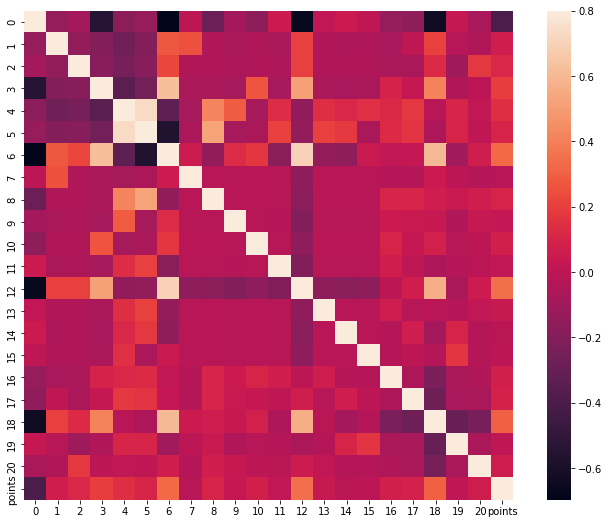

In [51]:
#correlation matrix

import matplotlib.pyplot as plt
corrmat = result.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


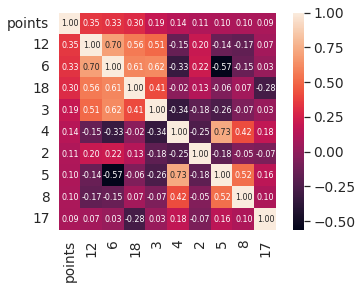

In [52]:
# df = df.drop(columns="region_2")
# df = df.drop(columns="region_2")
# df = df.drop(columns="region_2")
# df = df.drop(columns="region_2")
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'points')['points'].index
cm = np.corrcoef(result[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


### lets verify if SelectKBest select the same best 10 columns as correlation matrix

In [53]:
# Such a large set of features can cause overfitting and also slow computing
# Use feature selection to select the most important features
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=10)
selected_features = select.fit(ouss, y)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [ouss.columns[i] for i in indices_selected]

X_train_selected = ouss[colnames_selected]


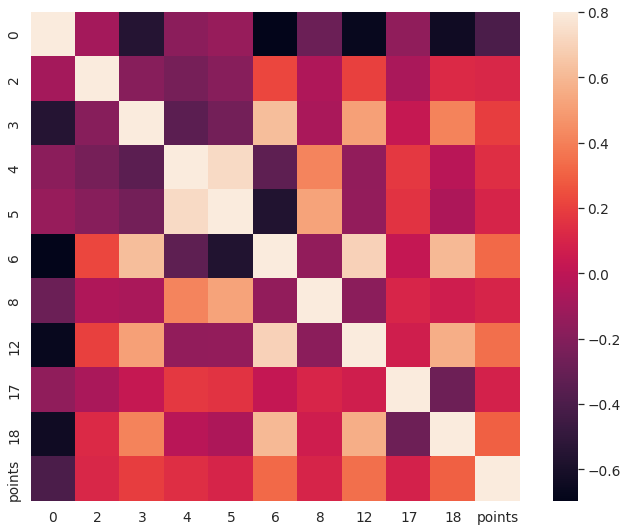

In [54]:
result_2 = pd.concat([X_train_selected, y], axis=1)
corrmat_2 = result_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_2, vmax=.8, square=True)


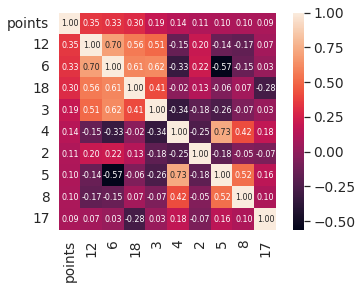

In [55]:
k = 10 #number of variables for heatmap
cols = corrmat_2.nlargest(k, 'points')['points'].index
cm = np.corrcoef(result_2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


GREAT / SelectKBest do the same work as correlation matrix

# MODEL BUILDING

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ouss, y, train_size=0.70, random_state=1)

In [57]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [ouss.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [58]:
# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc , y_hat



In [59]:
# Find performance of model using preprocessed data
auc_processed ,y_hat= find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

0.7926496905274533


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## CROSS VALIDATION

In [60]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


In [61]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
#pipeline = Pipeline(steps=[('imp', SimpleImputer(strategy='median')),('s',MinMaxScaler()),('m', model)]) 

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

result = cross_val_score(model, ouss, y,  scoring='accuracy',cv=cv, n_jobs=-1)

print(f'{round(np.mean(result),6)}')

0.715395


## ROC CURVE for logistiq reg

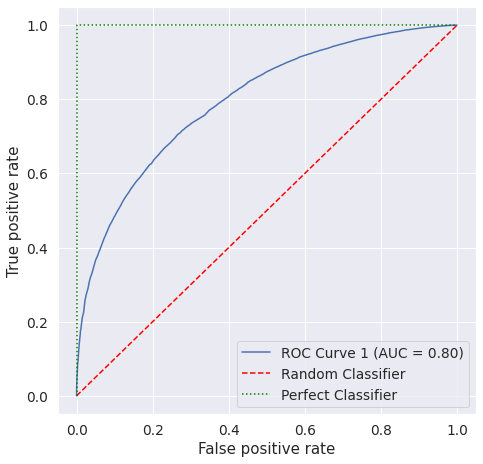

In [62]:
#stupid test // you must change variable name 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(solver='liblinear'))

pipeline.fit(ouss, y)
probs = pipeline.predict_proba(ouss)
fpr1, tpr1, thresholds = roc_curve(y, probs[:, 1], pos_label=1)
roc_auc1 = auc(fpr1, tpr1)


fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr1, tpr1, label='ROC Curve 1 (AUC = %0.2f)' % (roc_auc1))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

### DUMMY CLASSIFIER STUPID ALGO

In [63]:

model =DummyClassifier(strategy='most_frequent')

#pipeline = Pipeline(steps=[('imp', SimpleImputer(strategy='median')),('s',MinMaxScaler()),('m', model)]) 

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

result = cross_val_score(model, ouss, y,  scoring='accuracy',cv=cv, n_jobs=-1)

print(f'{round(np.mean(result),6)}')

0.528579


### knn with hyperpara..

knn 

In [64]:
# search for an optimal value of K for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score

k_range = list(range(40,45))
k_scores_train = []
k_scores_test =  []

for k in k_range:   
   print(k)
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train_selected, y_train)
  #  pred_train_knn= knn.predict(X_train_selected)
  #  r2_score_train_knn=r2_score(y_train, pred_train_knn)
  #  k_scores_train.append(r2_score_train_knn)
   
   pred_test_knn= knn.predict(X_test_selected)
   r2_score_test_knn=r2_score(y_test, pred_test_knn)
   k_scores_test.append(r2_score_test_knn)
   
#print(k_scores_train)
print(k_scores_test)

40
41
42
43
44
[-0.13724428032290437, -0.12828716893524428, -0.13642063789645276, -0.13240538106750166, -0.13199355985427608]


Text(0, 0.5, 'Cross-Validated Accuracy')

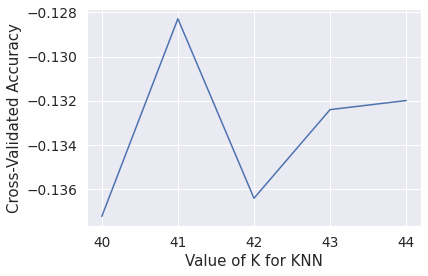

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores_test)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [66]:
roc_auc_score
knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(X_train_selected, y_train)
pred_test_knn= knn.predict(X_test_selected)
roc_auc_score_test_knn=roc_auc_score(y_test, pred_test_knn)

print(roc_auc_score_test_knn)

0.7174574932783789


## all algo test

In [67]:
result_2.columns

Index([0, 2, 3, 4, 5, 6, 8, 12, 17, 18, 'points'], dtype='object')

In [68]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #GLM
    #linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
col_num=[0, 2, 3, 4, 5, 6, 8, 12, 17, 18]
#create table to compare MLA predictions
MLA_predict = result_2['points']

#index through MLA and save performance to table
row_index = 0
for alg in MLA:
    try:
          print(row_index)

          #set name and parameters
          MLA_name = alg.__class__.__name__
          MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
          MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
          #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
          cv_results = model_selection.cross_validate(alg, result_2[col_num], result_2['points'], cv  = cv_split)

          MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
          #?????????????
          #MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
          MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
          #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
          MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
          

          #save MLA predictions - see section 6 for usage
          alg.fit(result_2[col_num], result_2['points'])
          MLA_predict[MLA_name] = alg.predict(result_2[col_num])
          
          row_index+=1
    except:
          print("Something else went wrong")
      

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict



0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1
2
3
4
5
6
7
8
9
10
11


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",NaN,0.720458,0.004656,5.823021
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",NaN,0.719504,0.004658,3.509417
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",NaN,0.71923,0.004187,2.587642
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",NaN,0.719191,0.00489,4.062671
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",NaN,0.71846,0.005019,0.851051
6,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",NaN,0.715152,0.006219,0.105944
7,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",NaN,0.698548,0.011738,0.204934
11,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",NaN,0.682755,0.02027,0.15453
10,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",NaN,0.67599,0.006049,0.040831
8,Perceptron,"{'alpha': 0.0001, 'class_weight': None, 'early...",NaN,0.641616,0.297653,0.137745
